<a href="https://colab.research.google.com/github/GhazalehKeyvani/Avina/blob/main/MLCrashCourse/fa_Representation_with_feature_crosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Representation with a Feature Cross


##اهداف یادگیری



*   استفاده از TensorFlow برای پیش نمایش ویژگی ها به روش های مختلف
*   معرفی ویژگی های دور ریختنی
*   برای ایجاد feature cross ویژگی های دور ریختنی را ترکیب می کنیم



##Import

In [ ]:
#@title Load the import

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

#خط های زیر تنظیم جزییات گزارش را انجام میدهند


pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print('imported the madules')


imported the madules


##نمونه ها را بارگذاری کنید، مقیاس بندی کنید و به هم بزنید


بارگزاری فایل های csv به صورت جداگانه در قالب دو دیتافریم:


*   train_df
*   test_df

و داده ها را در قالب median_house_value برای فهم بهتره انسانی می آوریم و سپس آنرا shuffle میکنیم

In [ ]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")



scale_factor = 1000.0
train_df['median_house_value'] /= scale_factor
test_df['median_house_value'] /= scale_factor

train_df = train_df.reindex(np.random.permutation(train_df.index))

##معرفی طول و عرض جغرافیایی به عنوان ارزش floating-point

در ماژول قبل ما از یک ویژگی معنادار استفاده کردیم اما در اینجا از دو ویژگی استفاده میکنیم در نتیجه به لایه های ورودی نیاز داریم

موقعیت مکانی محله ی ملک مهمترین ویژگی مشخص کننده ی قیمت ملک است در دیتاست خانه های کالیفورنیا ما دو ویژگی عرض و طوت جغرافیایی را داریم که با آنها می توانیم موقعیت محله ی ملک را مشخص کنیم

در کد زیر دو لایه ی tf.kerad.Input راداریم یکی برای مشخص کردن عرض جغرافیایی و دیگری برای طول جغرافیایی هر دو به عنوان مقادیر نقاط شناور floating-point


In [ ]:
#تنسور مقادیر شناور

inputs = {
    'latitude': tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                                      name='latitude'),
    'longitude': tf.keras.layers.Input(shape=(1,),dtype=tf.float32,
                                       name='longitude')

}

##تعریف توابعی  برای ایجاد و آموزش , یک مدل و یک تابع طراحی

سه تابع در کد زیر تعریف شده:



*   create_model

  به تنسورفلو می گوید که یک مدل رگرسیون خطی بر اساس ورودی ها و خروجی ها بسازد

*   train_model
*   plot_the_loss_curve


In [ ]:
#@title Define functions to create and train a model, and a plotting function

def create_model(my_inputs, my_outputs, my_learning_rate):

  model = tf.keras.Model(inputs=my_inputs, outputs = my_outputs)

  # ساخت لایه های قابل اجرا برای تنسور فلو با تبدیل آنها به مدل
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate) ,
                loss='mean_squared_error' ,
                metrics=[tf.keras.metrics.RootMeanSquaredError()] )

  return model

def train_model(model, dataset, epochs, batch_size, label_name):
  """یک مجموعه داده را به مدل وارد کنید تا آن را آموزش دهید"""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)


#لیست epoch ها به صورت جداگانه ذخیره میشود
  epochs = history.epoch


#مینیمم مطلق خطای هر epoch  را منزوی میکنیم
  hist = pd.DataFrame(history.history)
  rmse = hist['root_mean_squared_error']

  return epochs,rmse


def plot_the_loss_curve(epochs,rmse):
  """منحنی loss در مقابل epochs را بکش"""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs,rmse, label="Loss")
  plt.plot()
  plt.ylim([rmse.min()*0.94,rmse.max()*1.05])
  plt.show()

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")


Defined the create_model, train_model, and plot_the_loss_curve functions.


##آموزش مدل با معرفی مقادیر شناور

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 13615.5488 - root_mean_squared_error: 116.6857
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13540.6846 - root_mean_squared_error: 116.3644
Epoch 3/30
170/170 [==============================] - 0s 1ms/step - loss: 13496.9551 - root_mean_squared_error: 116.1764
Epoch 4/30
170/170 [==============================] - 0s 1ms/step - loss: 13445.1514 - root_mean_squared_error: 115.9532
Epoch 5/30
170/170 [==============================] - 0s 1ms/step - loss: 13383.8555 - root_mean_squared_error: 115.6886
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13358.6855 - root_mean_squared_error: 115.5798
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 13307.1543 - root_mean_squared_error: 115.3566
Epoch 8/30
170/170 [==============================] - 0s 1ms/step - loss: 13275.4229 - root_mean_squared_error: 115.2190
Epoch 9/30
170/170 [=======================

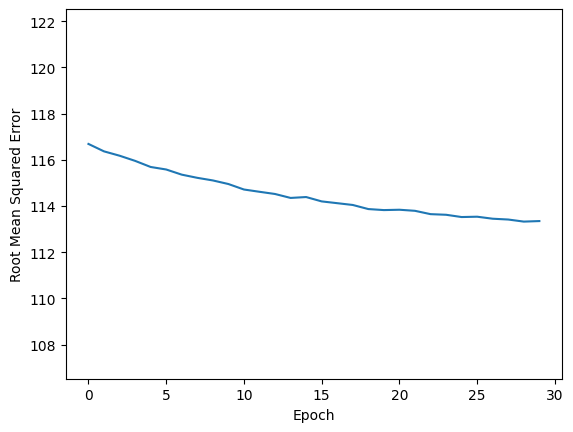


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 12183.4316 - root_mean_squared_error: 110.3786


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[12183.431640625, 110.37858581542969]

In [ ]:

#مقداردهی هایپر پارامتر ها
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'


#  دو لایه ی ورودی بهم متصل شده و می توان به صورت یک لایه از آن استفاده نمود
# تبدیل تنسور به یک لایه ی متراکم
preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())
dense_output = layers.Dense(units=1, name='dense_layer')(preprocessing_layer)

outputs = {
  'dense_output': dense_output
}

# ایجاد و گرد آوری تپو گرافی مدل
my_model = create_model(inputs, outputs, learning_rate)

# برای مشاهده یک PNG از لایه‌های این مدل، تماس را لغو نظر کنید
# `tf.keras.utils.plot_model` در زیر. پس از اجرای این سلول کد، کلیک کنید
# پوشه فایل در سمت چپ، سپس فایل «my_model.png».
# tf.keras.utils.plot_model(my_model، "my_model.png"، show_shapes=True)

# آموزش مدل روی داده های آموزشی
epochs, rmse = train_model(my_model, train_df, epochs, batch_size,label_name)

# خلاصه ی مدل را چاپ کن
my_model.summary()

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size= batch_size)

##تمرین 1 : چرا مقادیر اعشاری راه مناسبی برای نمایش طول و عرض جغرافیایی نیست؟



In [ ]:
#@title برای مشاهده پاسخ به تمرین 1 دوبار کلیک کنید.

# شماره نشان دهنده طول و عرض جغرافیایی به عنوان
# مقادیر ممیز شناور چیز زیادی ندارد
# قدرت پیش بینی به عنوان مثال، محله ها در
# عرض جغرافیایی 35 36/35 ارزش بیشتری ندارند
# (یا 35/36 کم ارزش تر) از خانه های در
# عرض جغرافیایی 36.

# نشان دهنده «طول و عرض جغرافیایی» به عنوان
# مقادیر ممیز شناور تقریباً هیچ ارائه نمی دهد
# قدرت پیش بینی ما فقط از مقادیر خام استفاده می کنیم
# برای ایجاد یک خط پایه برای آزمایش های آینده
# با بازنمایی بهتر.

##نمایش طول و عرض جغرافیایی در بسته ها buckets

 کد زیر عرض و طول جغرافیایی را در بسته هایی معرفی می کند هر بسته همه ی محله ها را با یک درجه معرفی می کند برای مثال محله های در طول جغرافیایی 35.4 و 35.8 دربسته های مشابه هستند ولی

 مدل برای هر بسته یک وزن جدا یاد خواهد گرفت برای مثال و مدل یک وزن برای محله هایی که در بسته ی با طول جغرافیایی 35 وزن متفاوتی با بسته ای با ول جغرافیایی 36 یاد می گیرد در اینجا 20 بسته در نظر گرفته شده:


*   10 بسته برای عرض جغرافیایی
*   10 بسته برای طول جغرافیایی



In [ ]:
resolution_in_degrees = 1.0
#ایجاد لیستی از اعداد معرفی شده در مرز بسته ها
latitude_boundries = list(np.arange(int(min(train_df['latitude'])),
                                    int(max(train_df['latitude']))
                                    , resolution_in_degrees))
print("latitude boundries: "+str(latitude_boundries))
#  ایجاد یک لایه ی گسسته سازی برای جداسازی عرض های جغرافیایی
latitude = tf. keras.layers.Discretization(
    bin_boundaries=latitude_boundries,
    name='discretization_latitude')(inputs.get('latitude'))

#  تعداد دسته بندی ها مساوی است با طول مرز های عرض جغرافیایی به علاوه ی یک
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)
# ایجاد یک لیست از اعداد معرفی کننده ی مرز بسته های عرض جغرافیایی
longitude_boundries = list(np.arange(int(min(train_df['longitude'])),
                                    int(max(train_df['longitude']))
                                    , resolution_in_degrees))
print("longitude boundries: "+str(longitude_boundries))
# ایجاد یک لایه ی گسسته سازی برای جداسازی طول های جغرافیایی
longitude = tf. keras.layers.Discretization(
    bin_boundaries=longitude_boundries,
    name='discretization_longitude')(inputs.get('longitude'))

#  تعداد دسته بندی ها مساوی است با طول مرز های طول جغرافیایی به علاوه ی یک
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(longitude_boundries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)


# Concatenate latitude and longitude into a single tensor as input for the Dense layer.
concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(concatenate_layer)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

latitude boundries: [32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
longitude boundries: [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]


##اموزش دادن مدل با معرفی بسته ها


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 0s 1ms/step - loss: 50987.7305 - root_mean_squared_error: 225.8046
Epoch 2/30
170/170 [==============================] - 0s 1ms/step - loss: 42000.4453 - root_mean_squared_error: 204.9401
Epoch 3/30
170/170 [==============================] - 0s 1ms/step - loss: 34294.8984 - root_mean_squared_error: 185.1888
Epoch 4/30
170/170 [==============================] - 0s 1ms/step - loss: 27787.8535 - root_mean_squared_error: 166.6969
Epoch 5/30
170/170 [==============================] - 0s 1ms/step - loss: 22468.8125 - root_mean_squared_error: 149.8960
Epoch 6/30
170/170 [==============================] - 0s 1ms/step - loss: 18344.9629 - root_mean_squared_error: 135.4436
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 15287.7314 - root_mean_squared_error: 123.6436
Epoch 8/30
170/170 [==============================] - 0s 1ms/step - loss: 13149.6475 - root_mean_squared_error: 114.6719
Epoch 9/30
170/170 [=======================

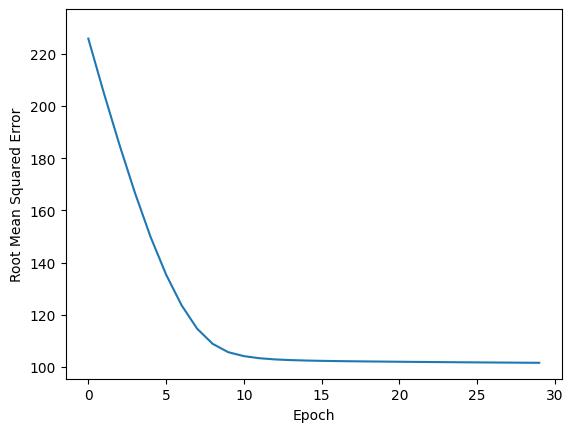


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 10182.4590 - root_mean_squared_error: 100.9082


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[10182.458984375, 100.90817260742188]

In [ ]:

#مقداردهی هایپر پارامتر ها
learning_rate = 0.05
epochs = 30


# ایجاد و گرد آوری تپو گرافی مدل
my_model = create_model(inputs, outputs, learning_rate)

# برای مشاهده یک PNG از لایه‌های این مدل، تماس را لغو نظر کنید
# `tf.keras.utils.plot_model` در زیر. پس از اجرای این سلول کد، کلیک کنید
# پوشه فایل در سمت چپ، سپس فایل «my_model.png».
# tf.keras.utils.plot_model(my_model، "my_model.png"، show_shapes=True)

# آموزش مدل روی داده های آموزشی
epochs, rmse = train_model(my_model, train_df, epochs, batch_size,label_name)

# خلاصه ی مدل را چاپ کن
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size= batch_size)

##تمرین 2 : آیا بسته ها عملکرد بهتری از نقاط شناور طول و عرض جغرافیایی دارند؟


In [ ]:
#@title برای پاسخ به Task 2 دوبار کلیک کنید.

# نمایندگی سطل عملکرد بهتری داشت
# نمایش ممیز شناور.
# با این حال، شما هنوز هم می توانید به مراتب بهتر عمل کنید.

##تمرین3 : بهترین راه نمایش موقعیت های مکانی چیست؟

بسته ها پیشرفت بزرگی نسبت به مقادیر ممیز شناور هستند. آیا می توانید راه بهتری برای شناسایی موقعیت مکانی با طول و عرض جغرافیایی شناسایی کنید؟

In [ ]:
#@title برای مشاهده پاسخ به Task 3 دوبار کلیک کنید.

# نشان دادن مکان به صورت ویژگی های متقاطع باید
#نتایج بهتری ایجاد کنند.

# در تمرین 2، عرض جغرافیایی را در نشان دادید
# بسته های یک بعدی و طول جغرافیایی در
# یک سری دیگر از بسته های تک بعدی.
#با این حال،
# مکان‌های دنیای واقعی در آن وجود دارند
#دو بعدی بنابراین شما باید
# مکان را به عنوان یک ویژگی دو بعدی نشان می دهد
# صلیب. یعنی از حدود 10 بسته
# عرض جغرافیایی عبور خواهید کرد
#  با بسته 10 یا بیشتر طول جغرافیایی به
# یک شبکه از 100 سلول ایجاد کنید.

# مدل برای هر یک از سلول ها وزنه های جداگانه یاد می گیرد


In [ ]:
resolution_in_degrees = 0.1
#ایجاد لیستی از اعداد معرفی شده در مرز بسته ها
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                    int(max(train_df['latitude']))
                                    , resolution_in_degrees))
print("latitude boundaries: "+str(latitude_boundaries))
#  ایجاد یک لایه ی گسسته سازی برای جداسازی عرض های جغرافیایی
latitude = tf. keras.layers.Discretization(
    bin_boundaries=latitude_boundries,
    name='discretization_latitude')(inputs.get('latitude'))


# ایجاد یک لیست از اعداد معرفی کننده ی مرز بسته های عرض جغرافیایی
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                    int(max(train_df['longitude']))
                                    , resolution_in_degrees))
print("longitude boundaries: "+str(longitude_boundaries))
# ایجاد یک لایه ی گسسته سازی برای جداسازی طول های جغرافیایی
longitude = tf. keras.layers.Discretization(
    bin_boundaries=longitude_boundries,
    name='discretization_longitude')(inputs.get('longitude'))

#  طول و عرض جغرافیایی را باهم تقاطع می دهیم تا به یک بردار one hot


feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundries)* len(longitude_boundries) ,
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, name='dense_layer')(feature_cross)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

latitude boundaries: [32.0, 32.1, 32.2, 32.300000000000004, 32.400000000000006, 32.50000000000001, 32.60000000000001, 32.70000000000001, 32.80000000000001, 32.90000000000001, 33.000000000000014, 33.100000000000016, 33.20000000000002, 33.30000000000002, 33.40000000000002, 33.50000000000002, 33.60000000000002, 33.700000000000024, 33.800000000000026, 33.90000000000003, 34.00000000000003, 34.10000000000003, 34.20000000000003, 34.30000000000003, 34.400000000000034, 34.500000000000036, 34.60000000000004, 34.70000000000004, 34.80000000000004, 34.90000000000004, 35.00000000000004, 35.100000000000044, 35.200000000000045, 35.30000000000005, 35.40000000000005, 35.50000000000005, 35.60000000000005, 35.70000000000005, 35.800000000000054, 35.900000000000055, 36.00000000000006, 36.10000000000006, 36.20000000000006, 36.30000000000006, 36.40000000000006, 36.500000000000064, 36.600000000000065, 36.70000000000007, 36.80000000000007, 36.90000000000007, 37.00000000000007, 37.10000000000007, 37.200000000000

Epoch 1/30
170/170 [==============================] - 0s 1ms/step - loss: 52837.9883 - root_mean_squared_error: 229.8652
Epoch 2/30
170/170 [==============================] - 0s 1ms/step - loss: 46680.5508 - root_mean_squared_error: 216.0568
Epoch 3/30
170/170 [==============================] - 0s 1ms/step - loss: 41063.0312 - root_mean_squared_error: 202.6402
Epoch 4/30
170/170 [==============================] - 0s 1ms/step - loss: 35943.1211 - root_mean_squared_error: 189.5867
Epoch 5/30
170/170 [==============================] - 0s 1ms/step - loss: 31333.8340 - root_mean_squared_error: 177.0137
Epoch 6/30
170/170 [==============================] - 0s 1ms/step - loss: 27254.9492 - root_mean_squared_error: 165.0907
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 23677.7090 - root_mean_squared_error: 153.8756
Epoch 8/30
170/170 [==============================] - 0s 1ms/step - loss: 20564.8926 - root_mean_squared_error: 143.4046
Epoch 9/30
170/170 [============

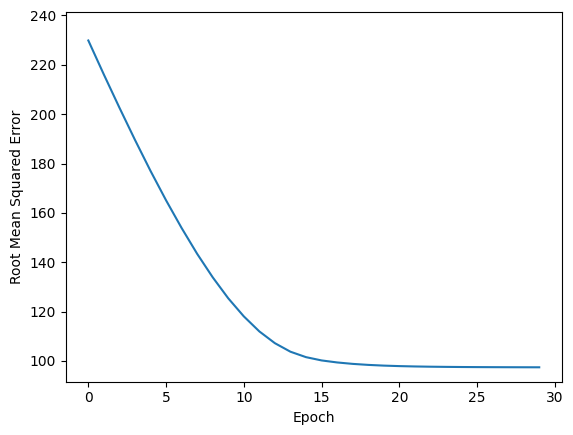


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 9319.5889 - root_mean_squared_error: 96.5380


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[9319.5888671875, 96.53801727294922]

In [ ]:

#مقداردهی هایپر پارامتر ها
learning_rate = 0.05
epochs = 30


# ایجاد و گرد آوری تپو گرافی مدل
my_model = create_model(inputs, outputs, learning_rate)


# آموزش مدل روی داده های آموزشی
epochs, rmse = train_model(my_model, train_df, epochs, batch_size,label_name)

# خلاصه ی مدل را چاپ کن
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size= batch_size)

##معرفی موقعیت مکانی به عنوان ویژگی متقاطع

## وظیفه 4: آیا عملکرد feature cross از بسته ها بهتر عمل کرد؟



مقادیر "root_mean_squared_error" مدل را برای دو نمایش مقایسه کنید (سطل ها در مقابل متقاطع ویژگی ها)؟ کدام مدل تولید شده است
ضرر کمتر؟

In [ ]:
#@title برای پاسخ به این سوال دوبار کلیک کنید.

# بله، نشان دادن این ویژگی ها به عنوان یک ویژگی
# مقادیر متقاطع loss بسیار کمتری نسبت به
# این ویژگی ها را به صورت بسته نشان می دهد

## وظیفه 5: وضوح تصویر متقاطع را تنظیم کنید

به سلول کد در بخش «نمایش مکان به عنوان متقاطع ویژگی» بازگردید. توجه داشته باشید که "رزولوشن_در_درجه" روی 1.0 تنظیم شده است. بنابراین، هر سلول مساحت 1.0 درجه عرض جغرافیایی در 1.0 درجه طول جغرافیایی را نشان می دهد که مربوط به سلول 110 کیلومتر در 90 کیلومتر است. این قطعنامه یک محله نسبتا بزرگ را تعریف می کند.

برای پاسخ به سؤالات زیر، «رزولوشن_در_درجه» را آزمایش کنید:

   1. کدام مقدار «رزولوشن_در_درجه» بهترین نتایج را ایجاد می کند (کمترین مقدار ضرر)؟
   2. چرا وقتی مقدار «رزولوشن_در_درجه» به زیر مقدار معینی می‌رسد، ضرر افزایش می‌یابد؟

در نهایت به سوال زیر پاسخ دهید:

   3. چه ویژگی (که در مجموعه داده مسکن کالیفرنیا وجود ندارد).
      پروکسی بهتری برای موقعیت مکانی نسبت به طول جغرافیایی X باشد.

In [ ]:
#@title برای پاسخ‌های احتمالی به Task 5 دوبار کلیک کنید.

#1. وضوح ~ 0.4 درجه بهترین را ارائه می دهد
#   نتایج.

#2. زیر 0.4 درجه، loss افزایش می یابد زیرا
# مجموعه داده شامل نمونه های کافی در نیست
# هر سلول برای پیش‌بینی دقیق قیمت‌ها
# آن سلول ها

#3. کد پستی ویژگی بسیار بهتری خواهد بود
# از طول جغرافیایی X، با این فرض
# مجموعه داده حاوی نمونه های کافی بود
# در هر کد پستی